### Get Distance metric

##### Chi-squared distance is used to check the similarity among two fecture vectors. Metric Rank-n and MSE info is returned

In [1]:
import numpy as np 
import csv
import pandas as pd
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
from matplotlib.ticker import FuncFormatter

### Test

In [ ]:
    data = pd.read_csv("calculated_features/awe-awet_lpq.csv")
    X = data.drop('class', axis=1)  
    y = data['class']
    X_np = X.values
    y_np = y.values
    s = (len(X_np), len(X_np), 2)
    y_pred = np.zeros(s)
    print(len(X_np))
    # Get distances matrix
    for i in range(len(X_np)):
        #minimun = 1e+10;    
        for j in range (len(X_np)):
            dis = chiSquared(X_np[i], X_np[j])
            #if dis < minimun and i != j:
            #minimun = res
            y_pred[i][j] = [dis, y[j]] 

In [54]:
# Ordcvledber matrix acordance to distance
    for i in range(len(y_pred)):
        b = y_pred[i]
        y_pred[i] = b[b[:,0].argsort()] 

In [55]:
    rank = 5
    count = 0
    # Get Rank counting
    rankbins = np.zeros(rank+1)
    for i in range (len(y_pred)):        
        for j in range (len(y_pred)):
            if y_pred[i][j][0] == 0.0: #if distance is 0, it's the same vector                
                continue
            else:
                if j > rank: #we are interested in evaluate only the rank-n                    
                    rankbins[rank] += 1
                    break;
                else: 
                    if y[i] == y_pred[i][j][1]:                                                 
                        rankbins[j] += 1                        
                        break                    

In [56]:
rankbins, count, i, j

(array([   0.,  389.,   94.,   52.,   32.,  433.]), 0, 999, 6)

### Getting Rank1 metric

In [9]:
from scipy import spatial
def chiSquared(a,b):
    res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return res

def chiSquared2(a,b):
    #res = np.sqrt(0.5*np.sum((a-b)**2/(a+b+1e-6)))
    return 0.5*np.sum((a-b)**2/(a+b+1e-6))

def cosineDistance(a,b):
    return spatial.distance.cosine(a,b)

def cosineDistance2(a,b):
    return 1 - spatial.distance.cosine(a,b) 

#Input: csvfile // Output: rankbins
def getMetrics(csvfilename, rank):
    data = pd.read_csv(csvfilename)
    Xdf = data.drop('class', axis=1)  
    ydf = data['class']
    X = Xdf.values
    y = ydf.values
    s = (len(X), len(X), 2)
    y_pred = np.zeros(s)
    
    # Normalization
    #for i in range (0, len(X[0])):
        #maximun = max(X[i,:])
        #if maximun != 0:
            #X[:,i] = X[:,i]/maximun
    
    # Get distances matrix
    for i in range(len(X)):        
        for j in range (len(X)):
            dis = cosineDistance(X[i], X[j])
            y_pred[i][j] = [dis, y[j]] 
            
    # Order matrix acording to distance
    for i in range(len(y_pred)):
        b = y_pred[i]
        y_pred[i] = b[b[:,0].argsort()] 
        
    # Get Rank counting
    rankbins = np.zeros(rank+2)
    for i in range (len(y_pred)):        
        for j in range (len(y_pred)):
            if y_pred[i][j][0] == 0.0: #if distance is 0, it's the same vector                
                continue
            else:
                if j > rank: #we are interested in evaluate only the rank-n                    
                    rankbins[rank+1] += 1
                    break;
                else: 
                    if y[i] == y_pred[i][j][1]:                                                 
                        rankbins[j] += 1                        
                        break 
    
    rank_rate = rankbins/sum(rankbins)                
    return rank_rate

### VGG16


In [3]:
#chi-squared
vgg = getMetrics("feature_vectors/vgg16_trained_cvledb_plus_ami_tested_awe.csv", 15)
vgg[1], np.sum(vgg[:5]), np.sum(vgg[:10]), np.sum(vgg[:15])

(0.127, 0.258, 0.399, 0.4820000000000001)

In [5]:
#chi-squared
vgg = getMetrics("feature_vectors/vgg16_trained_cvledb_plus_ami_tested_awe_4096.csv", 15)
vgg[1], np.sum(vgg[:5]), np.sum(vgg[:10]), np.sum(vgg[:15])

(0.116, 0.256, 0.364, 0.44700000000000006)

## MobileNet

In [7]:
#chi-squared
mobilenet = getMetrics("feature_vectors/mobilenet_trained_on_cvledb_tested_on_awe.csv", 15)
mobilenet[1], np.sum(mobilenet[:5]), np.sum(mobilenet[:10]), np.sum(mobilenet[:15])

(0.103, 0.229, 0.34700000000000003, 0.4340000000000001)

In [10]:
# trained in almost alll cvledb dataset (95%)
#chi-squared
mobilenet = getMetrics("feature_vectors/mobilenet_trained_on_cvledb_tested_on_awe_90_epoch.csv", 15)
mobilenet[1], np.sum(mobilenet[:5]), np.sum(mobilenet[:10]), np.sum(mobilenet[:15])

(0.103, 0.229, 0.34700000000000003, 0.4340000000000001)

## ResNet50

In [3]:
# chi-squared distance 
# trained on CVLEDB + AWE Datasets
# 75% to train - 25% to test - 50 epochs - 64 Batch size
# NO data augmentation
# tested on AMI
resnet = getMetrics("feature_vectors/resnet50_trained_on_cvledb_awe_tested_ami.csv", 15)
resnet[1], np.sum(resnet[:5]), np.sum(resnet[:10]), np.sum(resnet[:15])

(0.9271428571428572,
 0.9685714285714286,
 0.9785714285714286,
 0.9914285714285715)

In [5]:
# chi-squared distance
# trained on CVLEDB + AWE Datasets
# cross validation 75% train - 25% validation - 50 epochs - 64 Batch size
# NO data augmentation
# tested on AMI
resnet = getMetrics("feature_vectors/resnet50_trained_on_cvledb_awe_tested_ami_cross_val.csv", 15)
resnet[1], np.sum(resnet[:5]), np.sum(resnet[:10]), np.sum(resnet[:15])

(0.9271428571428572,
 0.9685714285714286,
 0.9785714285714286,
 0.9914285714285715)

In [6]:
# chi-squared distance
# trained on CVLEDB + AMI Datasets
# 100% to train - 50 epochs - 64 Batch size
# NO data augmentation
# tested on AWE
resnet = getMetrics("feature_vectors/resnet50_trained_on_cvledb_ami_tested_awe.csv", 15)
resnet[1], np.sum(resnet[:5]), np.sum(resnet[:10]), np.sum(resnet[:15])

(0.202, 0.377, 0.48900000000000005, 0.5700000000000001)

In [7]:
# chi-squared distance
# trained on CVLEDB + AMI Datasets
# 100% to train - 15 epochs - 64 Batch size
# Data augmentation to 100 samples per person
    #rotation_range=10,
    #width_shift_range=0.15,
	#height_shift_range=0.15,	
	#horizontal_flip=True,
	#fill_mode="constant")
# tested on AWE
resnet = getMetrics("feature_vectors/resnet50_trained_on_cvledb_ami_augmented100_tested_awe.csv", 15)
resnet[1], np.sum(resnet[:5]), np.sum(resnet[:10]), np.sum(resnet[:15])

(0.202, 0.377, 0.48900000000000005, 0.5700000000000001)

In [8]:
# chi-squared distance
# trained on CVLEDB + AWE Datasets
# 100% to train - 25 epochs - 64 Batch size
# Data augmentation to 100 samples per person
    #rotation_range=10,
    #width_shift_range=0.15,
	#height_shift_range=0.15,	
	#horizontal_flip=True,
	#fill_mode="constant")
# tested on AMI
resnet = getMetrics("feature_vectors/resnet50_trained_on_cvledb_awe_augmented100_tested_ami.csv", 15)
resnet[1], np.sum(resnet[:5]), np.sum(resnet[:10]), np.sum(resnet[:15])

(0.9271428571428572,
 0.9685714285714286,
 0.9785714285714286,
 0.9914285714285715)

### FaceNet

In [3]:
#cosine
facenet = getMetrics("facenet_embeddings/embeddings.csv", 15)
facenet[1], np.sum(facenet[:5]), np.sum(facenet[:10]), np.sum(facenet[:15])

(0.001, 0.005, 0.010000000000000002, 0.015000000000000006)

In [6]:
#chi-squared
facenet = getMetrics("facenet_embeddings/embeddings.csv", 15)
facenet[1], np.sum(facenet[:5]), np.sum(facenet[:10]), np.sum(facenet[:15])

(0.001, 0.005, 0.010000000000000002, 0.015000000000000006)

# Handcrafted

- 7 techniques (BSIF, DSIFT, HOG, LBP, LPQ, POEM, RILPQ)
- Rectangular cut ear images

### AMI Dataset
http://ctim.ulpgc.es/research_works/ami_ear_database/#cita

In [3]:
bsif = getMetrics("handcrafted_calculated_features/ami-awet_bsif.csv", 15)
bsif[1], np.sum(bsif[:5]), np.sum(bsif[:10]), np.sum(bsif[:15])

(0.6828571428571428, 0.7542857142857143, 0.78, 0.7971428571428572)

In [4]:
dsift = getMetrics("handcrafted_calculated_features/ami-awet_dsift.csv", 15)
dsift[1], np.sum(dsift[:5]), np.sum(dsift[:10]), np.sum(dsift[:15])

(0.4085714285714286,
 0.5485714285714286,
 0.6314285714285715,
 0.6942857142857142)

In [5]:
hog = getMetrics("handcrafted_calculated_features/ami-awet_hog.csv", 15)
hog[1], np.sum(hog[:5]), np.sum(hog[:10]), np.sum(hog[:15])

(0.6171428571428571, 0.6828571428571428, 0.717142857142857, 0.7399999999999999)

In [6]:
lbp = getMetrics("handcrafted_calculated_features/ami-awet_lbp.csv", 15)
lbp[1], np.sum(lbp[:5]), np.sum(lbp[:10]), np.sum(lbp[:15])

(0.6657142857142857,
 0.7400000000000001,
 0.7771428571428571,
 0.7914285714285715)

In [7]:
lpq = getMetrics("handcrafted_calculated_features/ami-awet_lpq.csv", 15)
lpq[1], np.sum(lpq[:5]), np.sum(lpq[:10]), np.sum(lpq[:15])

(0.7114285714285714,
 0.7628571428571428,
 0.7914285714285714,
 0.8171428571428572)

In [8]:
poem = getMetrics("handcrafted_calculated_features/ami-awet_poem.csv", 15)
poem[1], np.sum(poem[:5]), np.sum(poem[:10]), np.sum(poem[:15])

(0.6285714285714286,
 0.7171428571428571,
 0.7571428571428571,
 0.7828571428571429)

In [9]:
rilpq = getMetrics("handcrafted_calculated_features/ami-awet_rilpq.csv", 15)
rilpq[1], np.sum(rilpq[:5]), np.sum(rilpq[:10]), np.sum(rilpq[:15])

(0.7057142857142857,
 0.7628571428571429,
 0.8000000000000002,
 0.8200000000000003)

### AWE Dataset
http://awe.fri.uni-lj.si/download

In [10]:
bsif = getMetrics("handcrafted_calculated_features/awe-awet_bsif.csv", 15)
bsif[1], np.sum(bsif[:5]), np.sum(bsif[:10]), np.sum(bsif[:15])

(0.438, 0.5890000000000001, 0.6859999999999999, 0.745)

In [11]:
dsift = getMetrics("handcrafted_calculated_features/awe-awet_dsift.csv", 15)
dsift[1], np.sum(dsift[:5]), np.sum(dsift[:10]), np.sum(dsift[:15])

(0.395, 0.544, 0.648, 0.7020000000000001)

In [12]:
hog = getMetrics("handcrafted_calculated_features/awe-awet_hog.csv", 15)
hog[1], np.sum(hog[:5]), np.sum(hog[:10]), np.sum(hog[:15])

(0.445, 0.6100000000000001, 0.7100000000000001, 0.7570000000000001)

In [13]:
lbp = getMetrics("handcrafted_calculated_features/awe-awet_lbp.csv", 15)
lbp[1], np.sum(lbp[:5]), np.sum(lbp[:10]), np.sum(lbp[:15])

(0.407, 0.5760000000000001, 0.682, 0.7260000000000001)

In [14]:
lpq = getMetrics("handcrafted_calculated_features/awe-awet_lpq.csv", 15)
lpq[1], np.sum(lpq[:5]), np.sum(lpq[:10]), np.sum(lpq[:15])

(0.39, 0.5650000000000001, 0.686, 0.7460000000000001)

In [15]:
poem = getMetrics("handcrafted_calculated_features/awe-awet_poem.csv", 15)
poem[1], np.sum(poem[:5]), np.sum(poem[:10]), np.sum(poem[:15])

(0.467, 0.6240000000000001, 0.7190000000000001, 0.7700000000000001)

In [16]:
rilpq = getMetrics("handcrafted_calculated_features/awe-awet_rilpq.csv", 15)
rilpq[1], np.sum(rilpq[:5]), np.sum(rilpq[:10]), np.sum(rilpq[:15])

(0.376, 0.534, 0.638, 0.6940000000000001)

### CVLEBD
http://awe.fri.uni-lj.si/download

In [17]:
bsif = getMetrics("handcrafted_calculated_features/cvledb-awet_bsif.csv", 15)
bsif[1], np.sum(bsif[:5]), np.sum(bsif[:10]), np.sum(bsif[:15])

(0.7823383084577115,
 0.9054726368159204,
 0.9477611940298508,
 0.9639303482587065)

In [18]:
dsift = getMetrics("handcrafted_calculated_features/cvledb-awet_dsift.csv", 15)
dsift[1], np.sum(dsift[:5]), np.sum(dsift[:10]), np.sum(dsift[:15])

(0.7164179104477612,
 0.8768656716417911,
 0.9365671641791045,
 0.9502487562189055)

In [19]:
hog = getMetrics("handcrafted_calculated_features/cvledb-awet_hog.csv", 15)
hog[1], np.sum(hog[:5]), np.sum(hog[:10]), np.sum(hog[:15])

(0.7972636815920398,
 0.9191542288557213,
 0.9564676616915423,
 0.9676616915422886)

In [20]:
lbp = getMetrics("handcrafted_calculated_features/cvledb-awet_lbp.csv", 15)
lbp[1], np.sum(lbp[:5]), np.sum(lbp[:10]), np.sum(lbp[:15])

(0.7674129353233831,
 0.9004975124378108,
 0.9390547263681592,
 0.9639303482587064)

In [21]:
lpq = getMetrics("handcrafted_calculated_features/cvledb-awet_lpq.csv", 15)
lpq[1], np.sum(lpq[:5]), np.sum(lpq[:10]), np.sum(lpq[:15])

(0.7761194029850746,
 0.9104477611940299,
 0.9564676616915422,
 0.9763681592039799)

In [22]:
poem = getMetrics("handcrafted_calculated_features/cvledb-awet_poem.csv", 15)
poem[1], np.sum(poem[:5]), np.sum(poem[:10]), np.sum(poem[:15])

(0.8072139303482587, 0.914179104477612, 0.9514925373134329, 0.9664179104477613)

In [23]:
rilpq = getMetrics("handcrafted_calculated_features/cvledb-awet_rilpq.csv", 15)
rilpq[1], np.sum(rilpq[:5]), np.sum(rilpq[:10]), np.sum(rilpq[:15])

(0.7587064676616916,
 0.9042288557213931,
 0.9452736318407959,
 0.9614427860696517)

### Deep Learning

In [3]:
vgg16 = getMetrics("feature_vectors/vgg16_awe_nottunned.csv", 15)
vgg16[1], np.sum(vgg16[:5]), np.sum(vgg16[:10]), np.sum(vgg16[:15])

(0.095, 0.21600000000000003, 0.334, 0.4200000000000001)

In [5]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_nottunned.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.3694029850746269,
 0.6343283582089553,
 0.7786069651741293,
 0.8495024875621889)

In [7]:
vgg16_ = getMetrics("feature_vectors/vgg16_merged_nottunned.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.16019955654101994,
 0.31651884700665184,
 0.4401330376940133,
 0.5105321507760532)

In [3]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_ft_10e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.176, 0.32799999999999996, 0.451, 0.515)

In [4]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_ft_10e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.4092039800995025,
 0.6616915422885572,
 0.8196517412935324,
 0.8718905472636816)

In [5]:
vgg16_ = getMetrics("feature_vectors/vgg16_merged_ft_10e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.22671840354767184,
 0.39301552106430154,
 0.5121951219512194,
 0.5875831485587583)

In [3]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_ft_15e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.175, 0.33399999999999996, 0.457, 0.527)

In [4]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_ft_15e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.417910447761194, 0.6741293532338308, 0.8208955223880597, 0.8868159203980099)

In [ ]:
vgg16_ = getMetrics("feature_vectors/vgg16_merged_ft_15e.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

In [3]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_ft_15e_4kf.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.201, 0.352, 0.45500000000000007, 0.5380000000000001)

In [4]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_ft_15e_4kf.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.43532338308457713,
 0.6753731343283582,
 0.7960199004975124,
 0.8731343283582089)

In [5]:
vgg16_ = getMetrics("feature_vectors/vgg16_merged_ft_15e_4kf.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.24168514412416853,
 0.41740576496674064,
 0.5199556541019955,
 0.5825942350332595)

In [6]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_ft_15e_4kf_merged.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.183, 0.32499999999999996, 0.442, 0.51)

In [7]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_ft_15e_4kf_merged.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.5124378109452736, 0.7462686567164178, 0.8544776119402985, 0.900497512437811)

In [8]:
vgg16_ = getMetrics("feature_vectors/vgg16_merged_ft_15e_4kf_merged.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.2721729490022173,
 0.4395787139689578,
 0.5454545454545453,
 0.6047671840354766)

In [48]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_aug_ft_15e_4kf_cvledb.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.45149253731343286,
 0.7375621890547264,
 0.859452736318408,
 0.9067164179104479)

In [16]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_aug_ft_15e_4kf_awe.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.158, 0.318, 0.42800000000000005, 0.5140000000000001)

In [17]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_aug_ft_15e_4kf_merged.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.2222838137472284,
 0.39024390243902435,
 0.5266075388026608,
 0.5870288248337028)

In [47]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_aug_ft_15e_4kf_awe.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.145, 0.31099999999999994, 0.44100000000000006, 0.5140000000000001)

In [19]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_aug_ft_15e_4kf_cvledb.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.5049751243781094,
 0.7276119402985074,
 0.8395522388059702,
 0.8880597014925373)

In [20]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_aug_ft_15e_4kf_merged.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.22560975609756098,
 0.3952328159645233,
 0.5171840354767184,
 0.5770509977827052)

In [51]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_aug_ft_15e_4kf_awe_2.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.121, 0.249, 0.37000000000000005, 0.4520000000000001)

## Fusion

In [64]:
#chi-squared
fus = getMetrics("fusion_feature_vectors/vgg16_hog.csv", 15)
fus[1], np.sum(fus[:5]), np.sum(fus[:10]), np.sum(fus[:15])

/home/sol/.virtualenvs/maskrcnn/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


(0.006, 0.029, 0.08200000000000002, 0.14200000000000002)

In [62]:
#cosine
fus = getMetrics("fusion_feature_vectors/vgg16_hog.csv", 15)
fus[1], np.sum(fus[:5]), np.sum(fus[:10]), np.sum(fus[:15])

(0.383, 0.5720000000000001, 0.672, 0.7320000000000001)

In [68]:
#cosine
fus = getMetrics("fusion_feature_vectors/vgg16_hog_norm.csv", 15)
fus[1], np.sum(fus[:5]), np.sum(fus[:10]), np.sum(fus[:15])

(0.228, 0.38499999999999995, 0.483, 0.557)

In [66]:
#cosine
fus = getMetrics("fusion_feature_vectors/vgg16_poem.csv", 15)
fus[1], np.sum(fus[:5]), np.sum(fus[:10]), np.sum(fus[:15])

(0.281, 0.443, 0.5830000000000001, 0.6560000000000001)

In [67]:
#cosine
fus = getMetrics("fusion_feature_vectors/vgg16_bsif.csv", 15)
fus[1], np.sum(fus[:5]), np.sum(fus[:10]), np.sum(fus[:15])

(0.251, 0.43999999999999995, 0.559, 0.6210000000000001)

## Learned with PCA 512

In [59]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_aug_ft_15e_4kf_cvledb_pca_512.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.06716417910447761,
 0.16044776119402984,
 0.2810945273631841,
 0.3694029850746269)

In [59]:
vgg16_ = getMetrics("feature_vectors/vgg16_awe_aug_ft_15e_4kf_cvledb_pca_512.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.06716417910447761,
 0.16044776119402984,
 0.2810945273631841,
 0.3694029850746269)

In [60]:
vgg16_ = getMetrics("feature_vectors/vgg16_cvledb_aug_ft_15e_4kf_awe_pca_512.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.159, 0.301, 0.43700000000000006, 0.5210000000000001)

## Fusion 2

In [70]:
# cosine
# trained on cvledb augmented and tested on awe
vgg16_ = getMetrics("vgg16_hog_concat_512.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.463, 0.6540000000000001, 0.752, 0.8)

In [71]:
# cosine
# trained on cvledb augmented and tested on awe
vgg16_ = getMetrics("hog_poem_vgg16_concat_512.csv", 15)
vgg16_[1], np.sum(vgg16_[:5]), np.sum(vgg16_[:10]), np.sum(vgg16_[:15])

(0.528, 0.7030000000000001, 0.799, 0.8310000000000001)

In [11]:
# cosine
resnetlpq = getMetrics("fusion_feature_vectors/resnet50_plus_lpq_ami_pca_512.csv", 15)
resnetlpq[1], np.sum(resnetlpq[:5]), np.sum(resnetlpq[:10]), np.sum(resnetlpq[:15])

(0.7542857142857143, 0.8057142857142858, 0.8271428571428573, 0.835714285714286)

In [12]:
# cosine
resnetlpq = getMetrics("fusion_feature_vectors/resnet50_plus_rilpq_ami_pca_512.csv", 15)
resnetlpq[1], np.sum(resnetlpq[:5]), np.sum(resnetlpq[:10]), np.sum(resnetlpq[:15])

(0.8057142857142857, 0.8628571428571429, 0.8828571428571429, 0.892857142857143)

In [13]:
# cosine
resnetlpq = getMetrics("fusion_feature_vectors/resnet50_plus_lpq_rilpq_ami_pca_512.csv", 15)
resnetlpq[1], np.sum(resnetlpq[:5]), np.sum(resnetlpq[:10]), np.sum(resnetlpq[:15])

(0.7514285714285714,
 0.8114285714285715,
 0.8271428571428572,
 0.8371428571428572)

## Handcrafted usign cosine distance

In [40]:
rate_lbp = getMetrics("calculated_featurevgg16_awe_aug_ft_15e_4kf_cvledbs/awe-awet_bsif.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.367, 0.53, 0.625, 0.6960000000000001)

In [41]:
rate_lbp = getMetrics("calculated_features/awe-awet_dsift.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.405, 0.548, 0.648, 0.7040000000000001)

In [42]:
rate_lbp = getMetrics("calculated_features/awe-awet_hog.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.461, 0.6230000000000001, 0.7250000000000001, 0.7700000000000001)

In [43]:
rate_lbp = getMetrics("calculated_features/awe-awet_lbp.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.302, 0.447, 0.5660000000000001, 0.6260000000000001)

In [44]:
rate_lbp = getMetrics("calculated_features/awe-awet_lpq.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.336, 0.499, 0.628, 0.6900000000000001)

In [45]:
rate_lbp = getMetrics("calculated_features/awe-awet_rilpq.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.339, 0.505, 0.6110000000000001, 0.6700000000000002)

In [46]:
rate_lbp = getMetrics("calculated_features/awe-awet_poem.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.374, 0.5670000000000001, 0.675, 0.7290000000000001)

## Handcrafted with PCA usign cosine distance

In [33]:
rate_lbp = getMetrics("handcrafted_feature_vectors/bsif_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.491, 0.669, 0.759, 0.8180000000000001)

In [34]:
rate_lbp = getMetrics("handcrafted_feature_vectors/dsift_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.419, 0.5780000000000001, 0.681, 0.7320000000000001)

In [35]:
rate_lbp = getMetrics("handcrafted_feature_vectors/hog_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.503, 0.669, 0.759, 0.801)

In [36]:
rate_lbp = getMetrics("handcrafted_feature_vectors/lbp_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.446, 0.6220000000000001, 0.7120000000000001, 0.7650000000000001)

In [37]:
rate_lbp = getMetrics("handcrafted_feature_vectors/lpq_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.444, 0.6300000000000001, 0.7240000000000001, 0.7790000000000001)

In [38]:
rate_lbp = getMetrics("handcrafted_feature_vectors/poem_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.487, 0.659, 0.758, 0.8)

In [39]:
rate_lbp = getMetrics("handcrafted_feature_vectors/rilpq_pca_512.csv", 15)
rate_lbp[1], np.sum(rate_lbp[:5]), np.sum(rate_lbp[:10]), np.sum(rate_lbp[:15])

(0.362, 0.5279999999999999, 0.654, 0.7030000000000001)

### awda

In [3]:
rate_vgg16 = getMetrics("calculated_features/vgg16.csv", 5)
rate_vgg16[1]

0.095

In [4]:
rate_vgg16 = getMetrics("calculated_features/vgg16.csv", 15)
rate_vgg16[1]

0.095

In [14]:
rate_vgg16_25 = getMetrics("calculated_features/vgg16_25K.csv", 15)
rate_vgg16_25[1], np.sum(rate_vgg16_25[:5])

(0.127, 0.23299999999999998)

In [15]:
rate_resnet = getMetrics("calculated_features/resnet_2K_avg.csv", 15)
rate_resnet[1], np.sum(rate_resnet[:5])

(0.202, 0.377)

In [16]:
rate_mobnet = getMetrics("calculated_features/mobnet_avg.csv", 15)
rate_mobnet[1], np.sum(rate_mobnet[:5])

(0.087, 0.19799999999999998)

### Plotting results

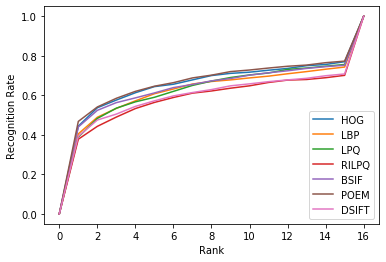

<Figure size 432x288 with 0 Axes>

In [17]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_hog))
line_lbp, = plt.plot(np.cumsum(rate_lbp))
line_lpq, = plt.plot(np.cumsum(rate_lpq))
line_rilpq, = plt.plot(np.cumsum(rate_rilpq))
line_bsif, = plt.plot(np.cumsum(rate_bsif))
line_poem, = plt.plot(np.cumsum(rate_poem))
line_dsift, = plt.plot(np.cumsum(rate_dsift))
plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
           ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank5_Handcrafted.png')

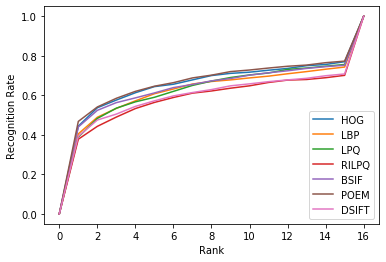

<Figure size 432x288 with 0 Axes>

In [18]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_hog))
line_lbp, = plt.plot(np.cumsum(rate_lbp))
line_lpq, = plt.plot(np.cumsum(rate_lpq))
line_rilpq, = plt.plot(np.cumsum(rate_rilpq))
line_bsif, = plt.plot(np.cumsum(rate_bsif))
line_poem, = plt.plot(np.cumsum(rate_poem))
line_dsift, = plt.plot(np.cumsum(rate_dsift))
plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
           ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank15_Handcrafted.png')

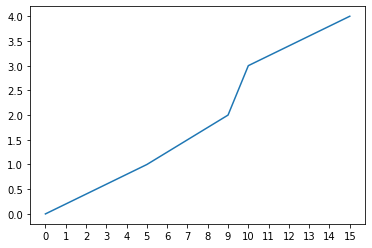

In [27]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
plt.plot(x,y)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.show()

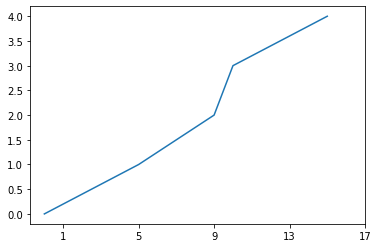

In [47]:
x = [0,5,9,10,15]
y = [0,1,2,3,4]
fig, ax = plt.subplots()
ax.plot(x,y)
#start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(1, 20, 4))
#ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%0.1f'))
plt.show()

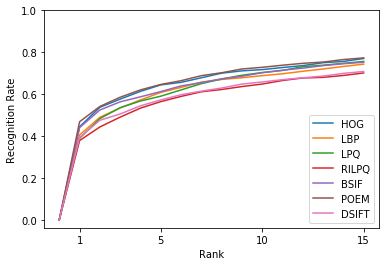

In [58]:
#plt.figure()
fig, ax = plt.subplots()
line_hog, = plt.plot(np.cumsum(rate_hog[0:16]))
line_lbp, = plt.plot(np.cumsum(rate_lbp[0:16]))
line_lpq, = plt.plot(np.cumsum(rate_lpq[0:16]))
line_rilpq, = plt.plot(np.cumsum(rate_rilpq[0:16]))
line_bsif, = plt.plot(np.cumsum(rate_bsif[0:16]))
line_poem, = plt.plot(np.cumsum(rate_poem[0:16]))
line_dsift, = plt.plot(np.cumsum(rate_dsift[0:16]))
plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
           ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
ax.xaxis.set_ticks([1,5,10,15])
ax.yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
#plt.title('Title')
plt.show()
fig.savefig("Rank15_Handcrafted_2.png")

In [20]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_vgg16))
#plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
 #          ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank5_VGG16.png')

NameError: name 'rate_vgg16' is not defined

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_vgg16))
#plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
 #          ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank15_VGG16.png')

In [ ]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_vgg16_25))
#plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
 #          ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank15_VGG16.png')

In [ ]:
plt.figure()
line_hog, = plt.plot(np.cumsum(rate_resnet))
#plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
 #          ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank15_resnet.png')

In [ ]:
plt.figure()
line_, = plt.plot(np.cumsum(rate_mobnet))
#plt.legend((line_hog, line_lbp, line_lpq, line_rilpq, line_bsif, line_poem, line_dsift),
 #          ('HOG', 'LBP', 'LPQ', 'RILPQ', 'BSIF', 'POEM', 'DSIFT'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
#plt.title('Title')
plt.show()
plt.savefig('Rank15_resnet.png')

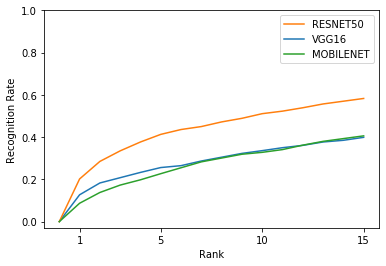

In [62]:
#plt.figure()
fig, ax = plt.subplots()
line_vgg, = plt.plot(np.cumsum(rate_vgg16_25[0:16]))
line_resnet, = plt.plot(np.cumsum(rate_resnet[0:16]))
line_mobnet, = plt.plot(np.cumsum(rate_mobnet[0:16]))
plt.legend((line_resnet, line_vgg, line_mobnet),
           ('RESNET50','VGG16', 'MOBILENET'))
plt.xlabel('Rank')
plt.ylabel('Recognition Rate') #for each component
ax.xaxis.set_ticks([1,5,10,15])
ax.yaxis.set_ticks([0,0.2,0.4,0.6,0.8,1])
#plt.title('Title')
plt.show()
fig.savefig('Rank15_DL_2.png')